In [1]:
import numpy as np
import A4library as nt
import matplotlib.pyplot as plt
import math

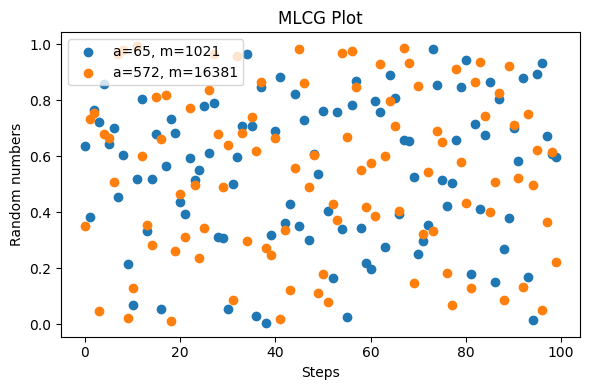

In [18]:
# Q1

plt.figure(figsize=(6, 4))

nt.plot_MLCG(65, 1021, 0, 10)
nt.plot_MLCG(572, 16381, 0, 10)

plt.xlabel("Steps")
plt.ylabel("Random numbers")
plt.title("MLCG Plot")
plt.legend()
plt.tight_layout()
plt.show()

Approximation with Generator 1: 2.0020364608098733
Approximation with Generator 2: 1.9998084559755098
The true value of integral is approximately equal to 2



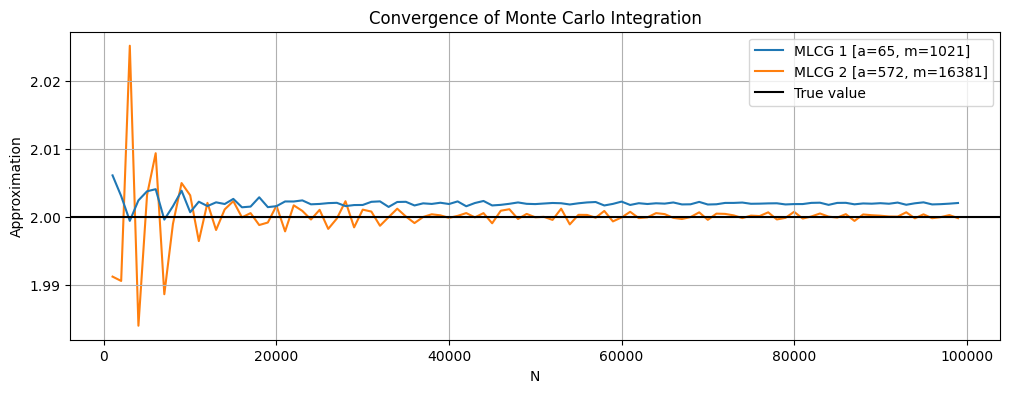

In [5]:
# Q2

lc1 = nt.MLCG(a=65, m=1021)
lc2 = nt.MLCG(a=572, m=16381)

def f(x):
	return np.cos(x)

a = -np.pi / 2
b = np.pi / 2

# Calculate and plot the approximated solutions
I1 = []
I2 = []

i_0 = 1000
i_f = 100000
it = 1000

for n in range(i_0, i_f, it):
	I_val = nt.Monte_carlo(f, a, b, n, lc1)
	I1.append(I_val)
    
for n in range(i_0, i_f, it):
	I_val = nt.Monte_carlo(f, a, b, n, lc2)
	I2.append(I_val)
    
print('Approximation with Generator 1:', I1[-1])
print('Approximation with Generator 2:', I2[-1])
print('The true value of integral is approximately equal to 2')
print()

# Plot the solutions

plt.figure(figsize=(12, 4))

plt.plot(range(i_0, i_f, it), I1, label='MLCG 1 [a=65, m=1021]', zorder = 2)
plt.plot(range(i_0, i_f, it), I2, label='MLCG 2 [a=572, m=16381]', zorder = 1)
plt.axhline(y=2, color='black', linestyle='-', label='True value', zorder = 10)
plt.xlabel('N')
plt.ylabel('Approximation')
plt.title('Convergence of Monte Carlo Integration')
plt.legend()
plt.grid()
plt.show()

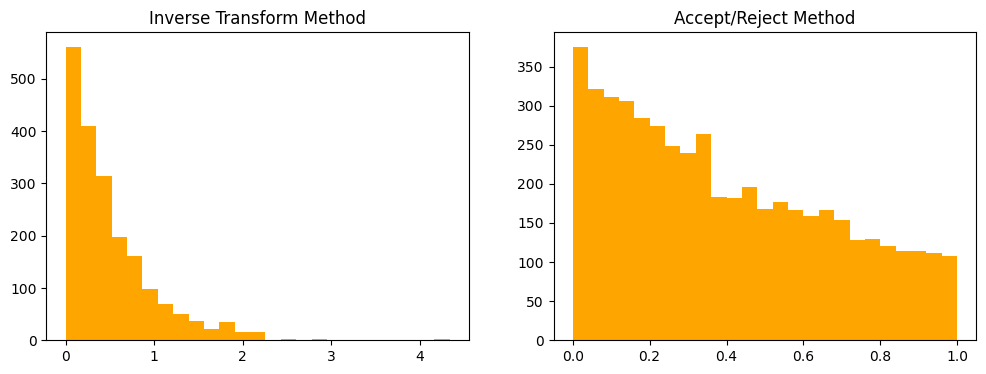

The histograms shows that the accept/reject method is more efficient than the inverse transform method.


In [19]:
# Q3

def p(x):
    return np.exp(-2 * x)

def p_inv(y):
    return -0.5 * np.log(1 - y)

def q(x):
    return 2 - x


# Inverse transform method
inverse_transform = p_inv(np.random.uniform(0, 1, 2000))

# Accept/reject method
accept_reject = []
while len(accept_reject) < 5000:
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, 2)
    if u <= p(x) / q(x):
        accept_reject.append(x)

# Plot the histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(inverse_transform, bins=25, density=False, color = 'orange')
plt.title('Inverse Transform Method')

plt.subplot(1, 2, 2)
plt.hist(accept_reject, bins=25, density=False, color= 'orange')
plt.title('Accept/Reject Method')

plt.show()

print('The histograms shows that the accept/reject method is more efficient than the inverse transform method.')

In [16]:
# Q4

def f(x):
    return np.exp(-2 * x) / (1 + x**2)

# Importance sampling functions
def p1(x):
    return 0.5

def p1_inv(y):
    return 2 * y

def p2(x):
    return np.exp(-x)

def p2_inv(y):
    return -np.log(1 - y)

def p3(x):
    return np.exp(-x / 2) / (2 * (1 - np.exp(-1/2)))

def p3_inv(y):
    return -2 * np.log(1 - y * (1 - np.exp(-1/2)))

# Calculate the approximations and variances
n = 10000
I_p1, var_p1 = nt.monte_carlo_imp_sampling(f, p1, p1_inv, n)
I_p2, var_p2 = nt.monte_carlo_imp_sampling(f, p2, p2_inv, n)
I_p3, var_p3 = nt.monte_carlo_imp_sampling(f, p3, p3_inv, n)


print(f"With p1: Approximation = {I_p1:4f}, Variance = {var_p1:4f}")
print(f"With p2: Approximation = {I_p2:4f}, Variance = {var_p2:4f}")
print(f"With p3: Approximation = {I_p3:4f}, Variance = {var_p3:4f}")

print('\nThe Numerical value of given integral is approximately equal to 0.397675.\nThe variance for importance sampling with p3 is less than p2 which in turn is less than p1')

With p1: Approximation = 0.396380, Variance = 0.266455
With p2: Approximation = 0.397358, Variance = 0.105018
With p3: Approximation = 0.379743, Variance = 0.044034

The Numerical value of given integral is approximately equal to 0.397675.
The variance for importance sampling with p3 is less than p2 which in turn is less than p1
